In [7]:
# Define the path to your COCO dataset annotations and images
data_dir = 'C:\\Users\\ICMR-MIT\\Downloads\\icmr_project\\data'
datasets = ['dataset_1.json', 'dataset_2.json', 'dataset_3.json', 'dataset_4.json', 'dataset_5.json']
image_dir = 'images'  # Modify this according to your dataset

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

In [19]:
def DataLoader(dataset_list):

    image_list, mask_list = [], []

    for dataset in dataset_list:
        # Load the COCO dataset
        coco_api = COCO(os.path.join(data_dir,dataset))
    
        # Get the image IDs
        image_ids = coco_api.getImgIds()

        for image_id in image_ids:
            # Get the image info
            image_info = coco_api.loadImgs(image_id)[0]

            # Load the image
            image = cv2.imread(os.path.join(data_dir, os.path.join(image_dir, image_info['file_name'])))

            # Get the annotations for the image
            ann_ids = coco_api.getAnnIds(imgIds=image_id)
            anns = coco_api.loadAnns(ann_ids)

            mask = [coco_api.annToMask(ann) for ann in anns]
            if len(mask) == 0:
                continue
            mask = np.reshape(mask, (600,800))

            image_list.append(image)
            mask_list.append(mask)
    
    return image_list, mask_list 

In [20]:
images, masks = DataLoader(datasets)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


(-0.5, 799.5, 599.5, -0.5)

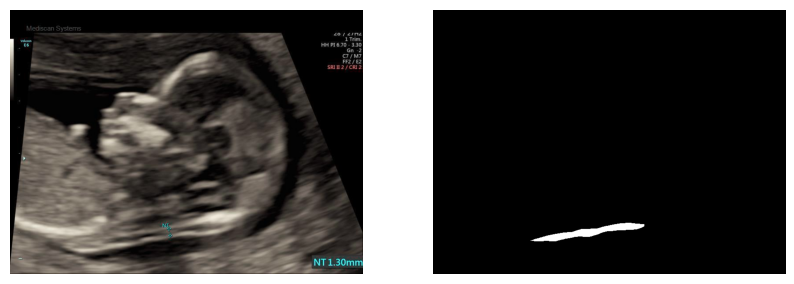

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(images[5], cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(masks[5], cmap='gray')
plt.axis('off')